In [1]:
from easy_text_clustering.clusterer import ClusterClassifier
from datasets import load_dataset

ds = load_dataset('billingsmoore/84000-bo-en', split='train')

Using the latest cached version of the dataset since billingsmoore/84000-bo-en couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/j/.cache/huggingface/datasets/billingsmoore___84000-bo-en/default/0.0.0/575c3a66a8386754af47a3ece2f7c9a99bfd2907 (last modified on Mon Feb  3 20:42:08 2025).


In [2]:
ds[0]

{'tibetan': '༄༅༅། །རྒྱ་གར་སྐད་དུ། ཨཱརྱ་སུ་བརྞྞ་བཱ་ལུ་ཀོ་པ་མ་ནཱ་མ་མ་ཧཱ་ཡཱ་ན་སཱུ་ཏྲ། བོད་སྐད་དུ།',
 'english': 'The Noble Mahāyāna Sūtra Like Gold Dust'}

INFO:root:Using precomputed embeddings...
INFO:root:Building FAISS index...
INFO:root:Using precomputed projections...
INFO:root:Clustering...


Using HDBSCAN params={'cluster_selection_method': 'leaf', 'min_cluster_size': 150, 'cluster_selection_epsilon': 0.2}


AttributeError: 'NoneType' object has no attribute 'keys'

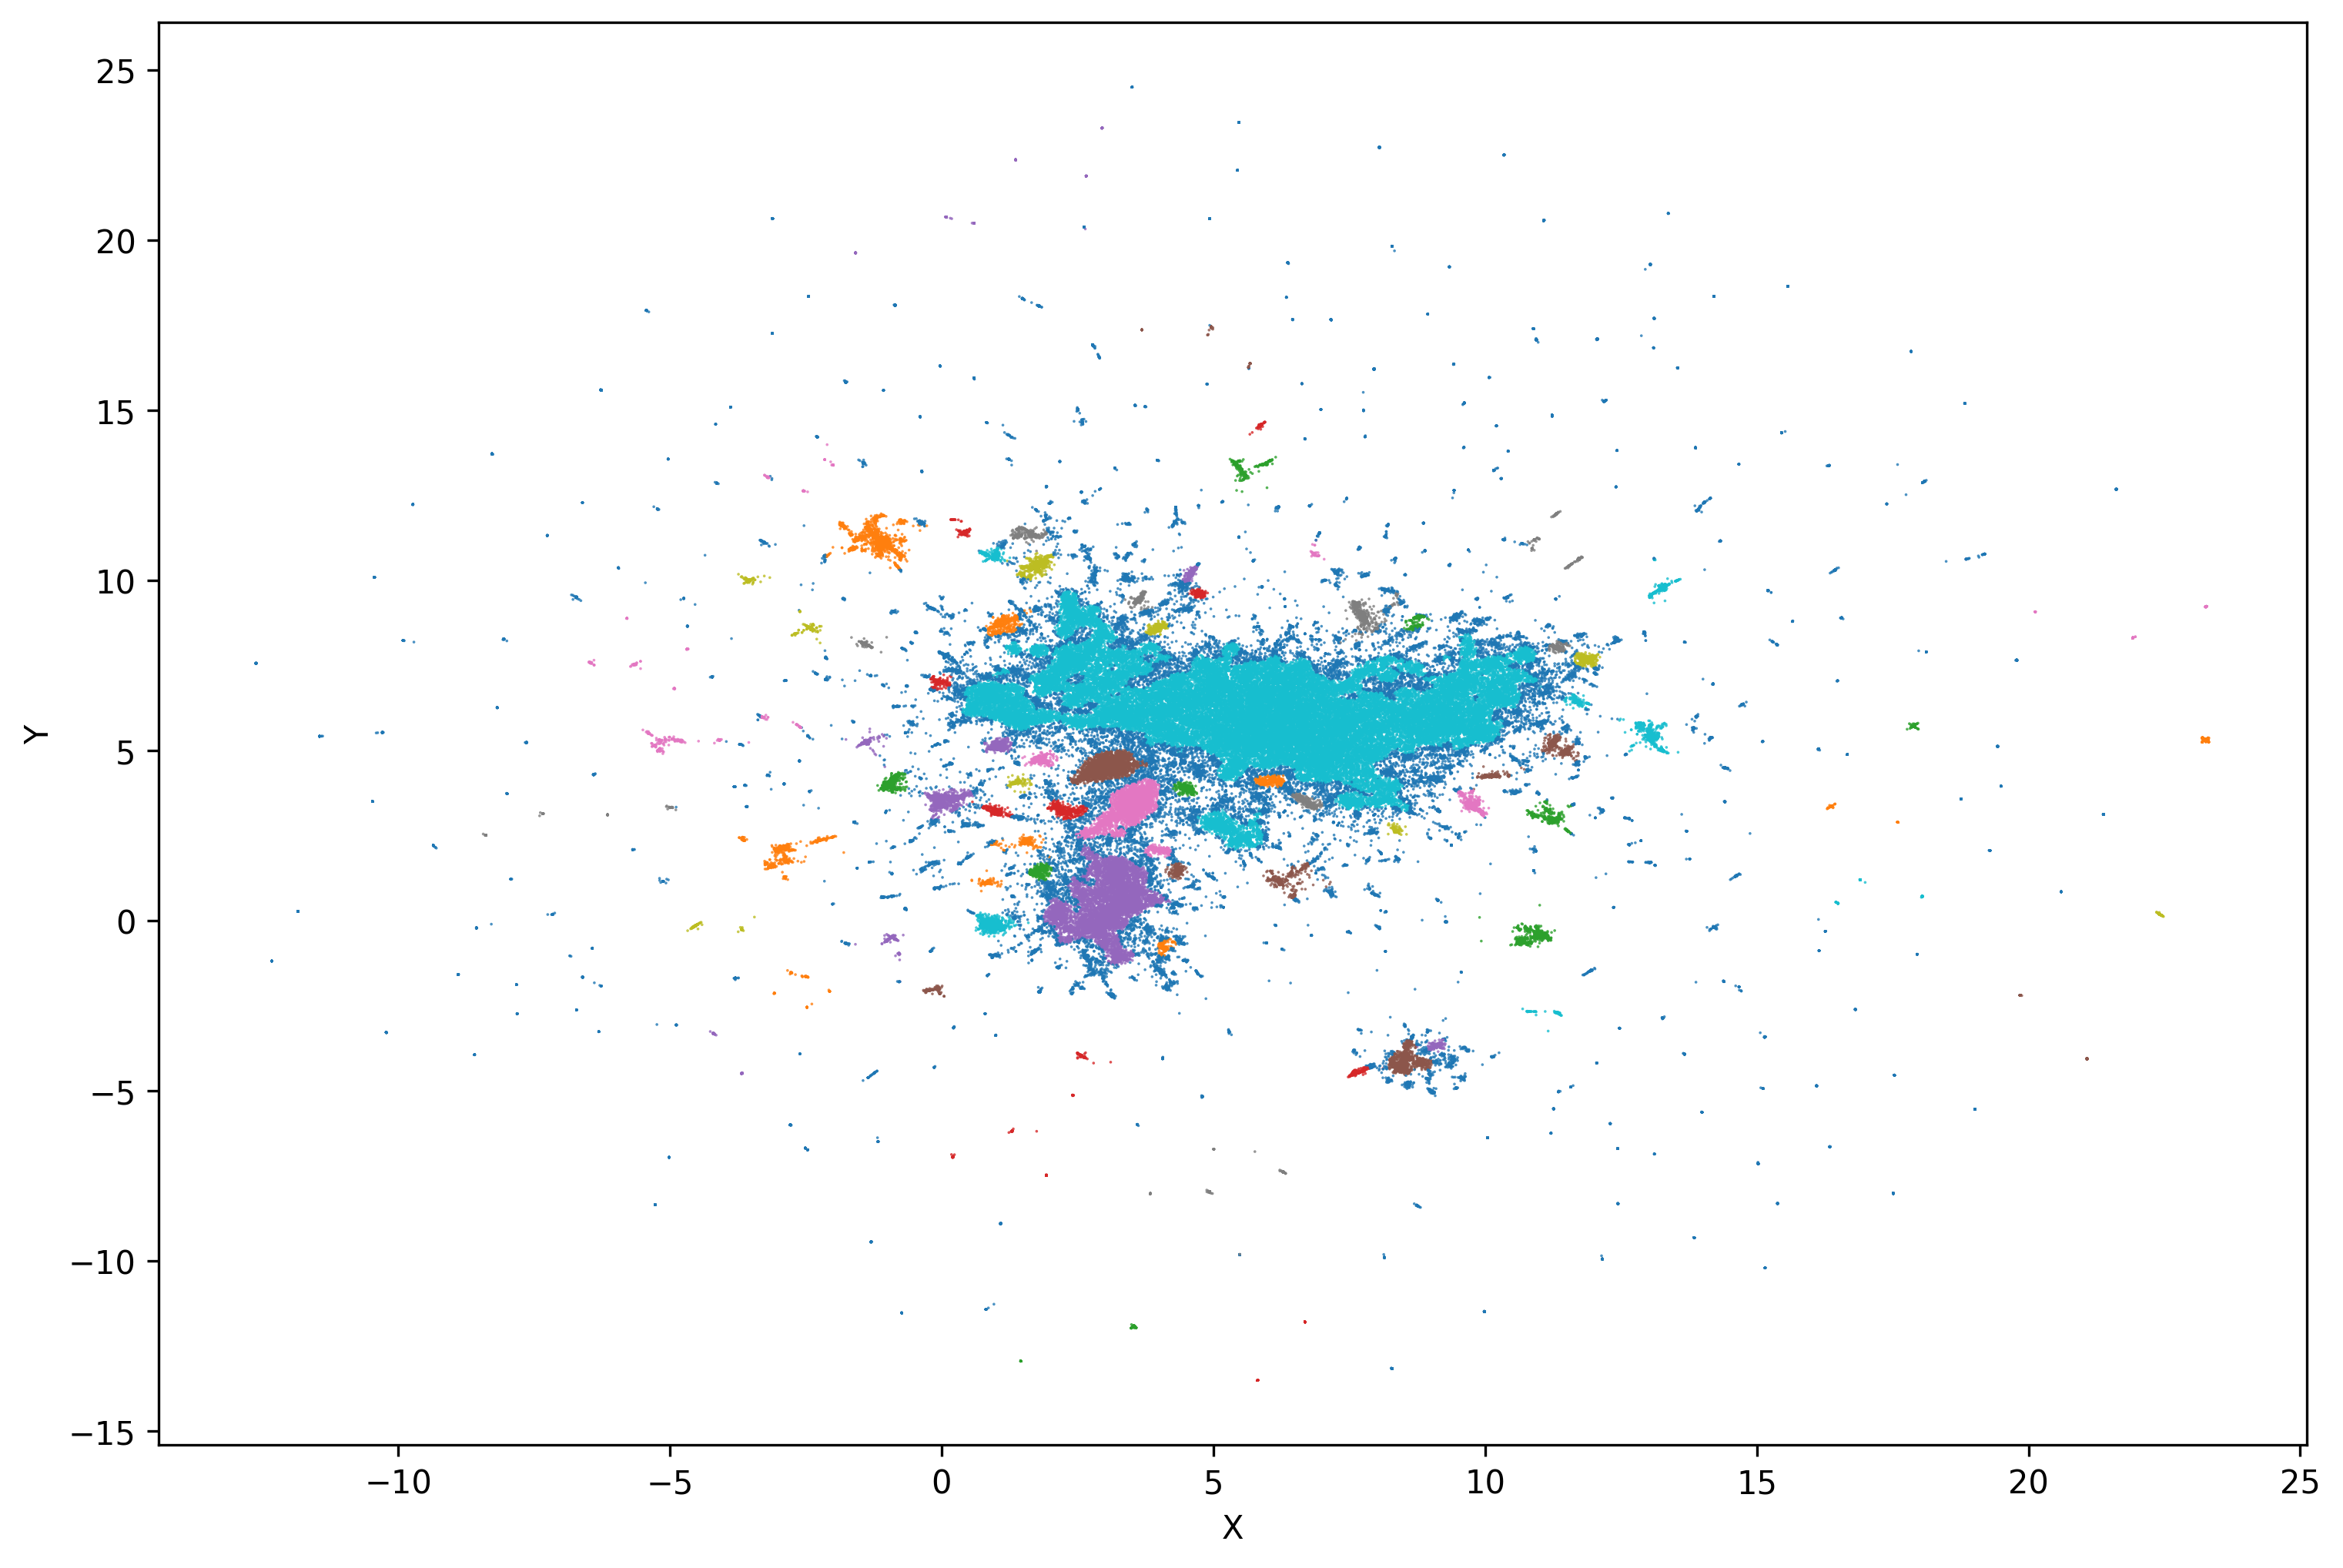

In [14]:
from easy_text_clustering.clusterer import ClusterClassifier

#cc = ClusterClassifier(embed_device='cuda', summary_create=False)

cc.fit(ds['english'],clustering_args={'cluster_selection_method': 'leaf',
 'min_cluster_size': 150,
 'cluster_selection_epsilon': 0.2})
cc.show()

AttributeError: 'NoneType' object has no attribute 'keys'

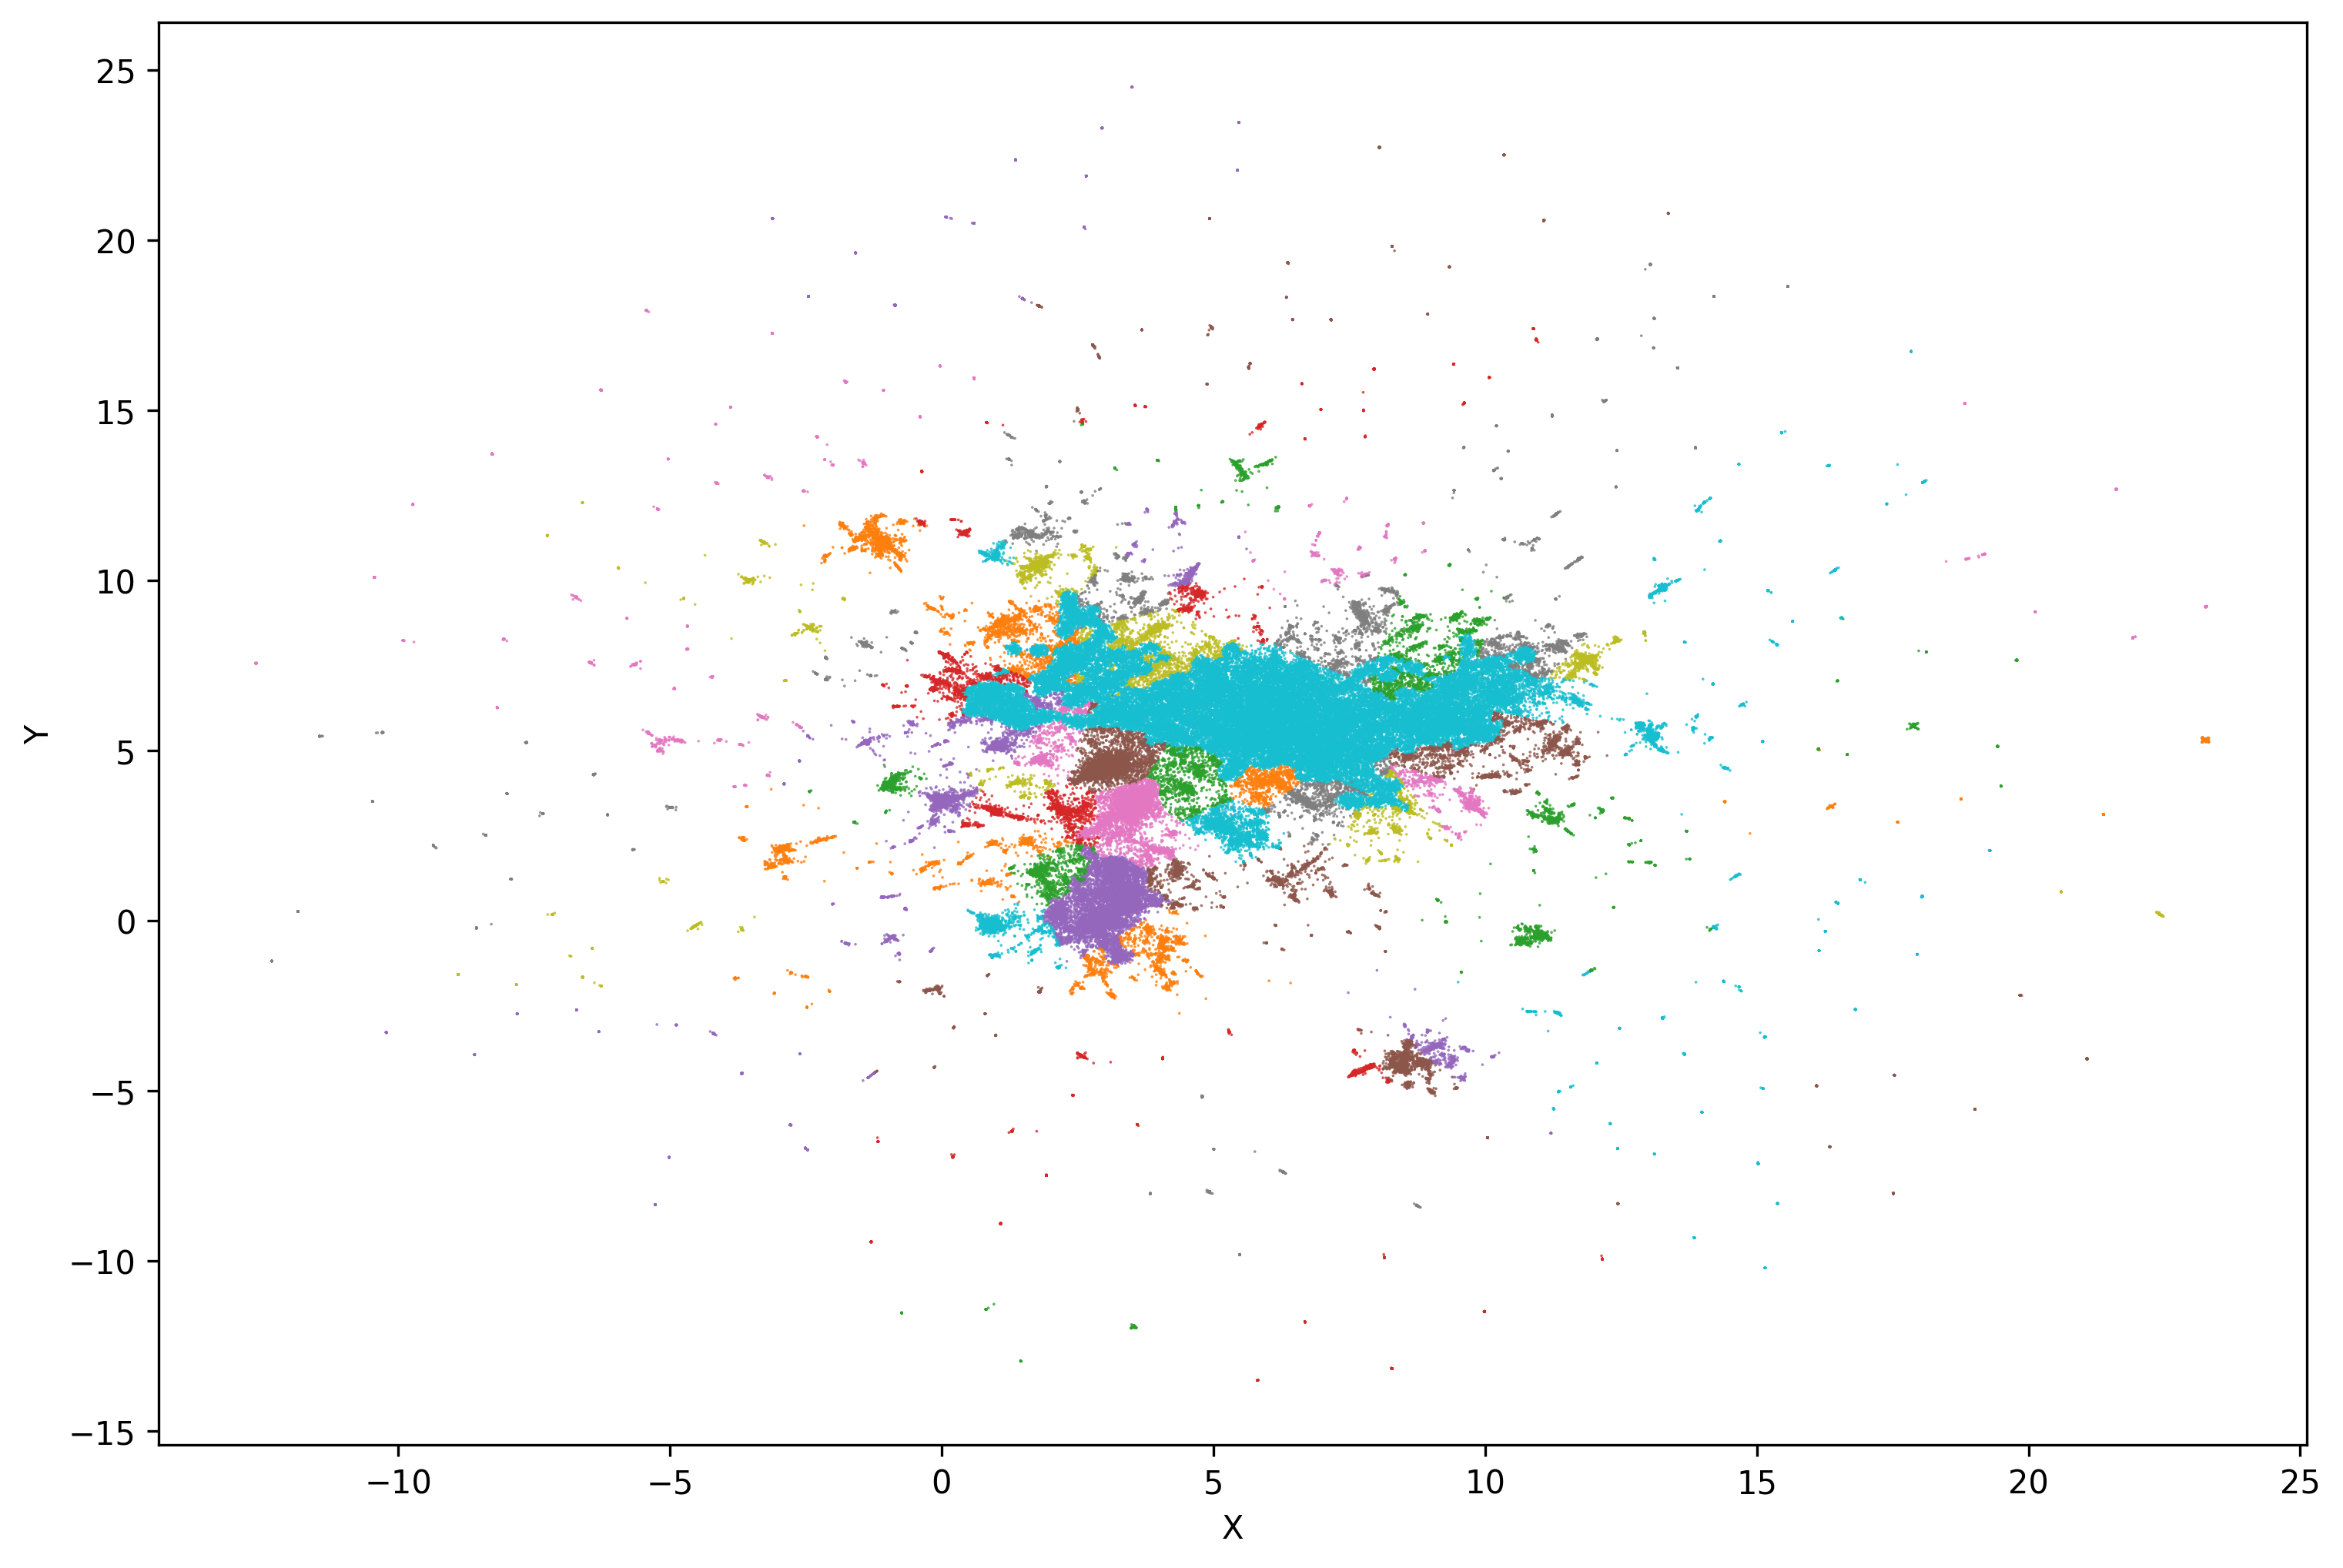

In [16]:
import math

# Keep [original key, projection coords]
outlier_projs = [[elt, cc.projections[elt]] for elt in cc.label2docs[-1]]

# Precompute cluster centers (excluding the -1 key)
cluster_centers = [[key, val] for key, val in cc.cluster_centers.items() if key != -1]

# Find best label by finding the closest center
best_labels = []
for proj in outlier_projs:
    # Calculate distances to all cluster centers
    closest_label = min(cluster_centers, key=lambda center: math.dist(proj[1], center[1]))[0]
    best_labels.append([proj[0], closest_label])

# change labels to reflect changes
for new in best_labels:
    cc.cluster_labels[new[0]] = new[1]

# update the other features of the classifier accordingly
cc.store_cluster_info(cc.cluster_labels)

cc.show()

In [23]:
cc.cluster_summaries = cc.summarize(cc.texts, cc.cluster_labels)

Request:
<s>[INST]Example 1:
Why?

Example 2:
“No, Blessed Lord,” he replied.

Example 3:
“No, Blessed Lord,” he replied.

Example 4:
“No, Blessed Lord,” he replied.

Example 5:
“No, Blessed Lord,” he replied.

Example 6:
“No, Blessed Lord,” he replied.

Example 7:
“No, Blessed Lord,” he replied.

Example 8:
“No, Blessed Lord,” he replied.

Example 9:
“No, Blessed Lord,” he replied.

Example 10:
Why?

Use three words total (comma separated)to describe general topics in above texts. Under no circumstances use enumeration. Example format: Tree, Cat, Fireman[/INST]
Number of clusters is 82


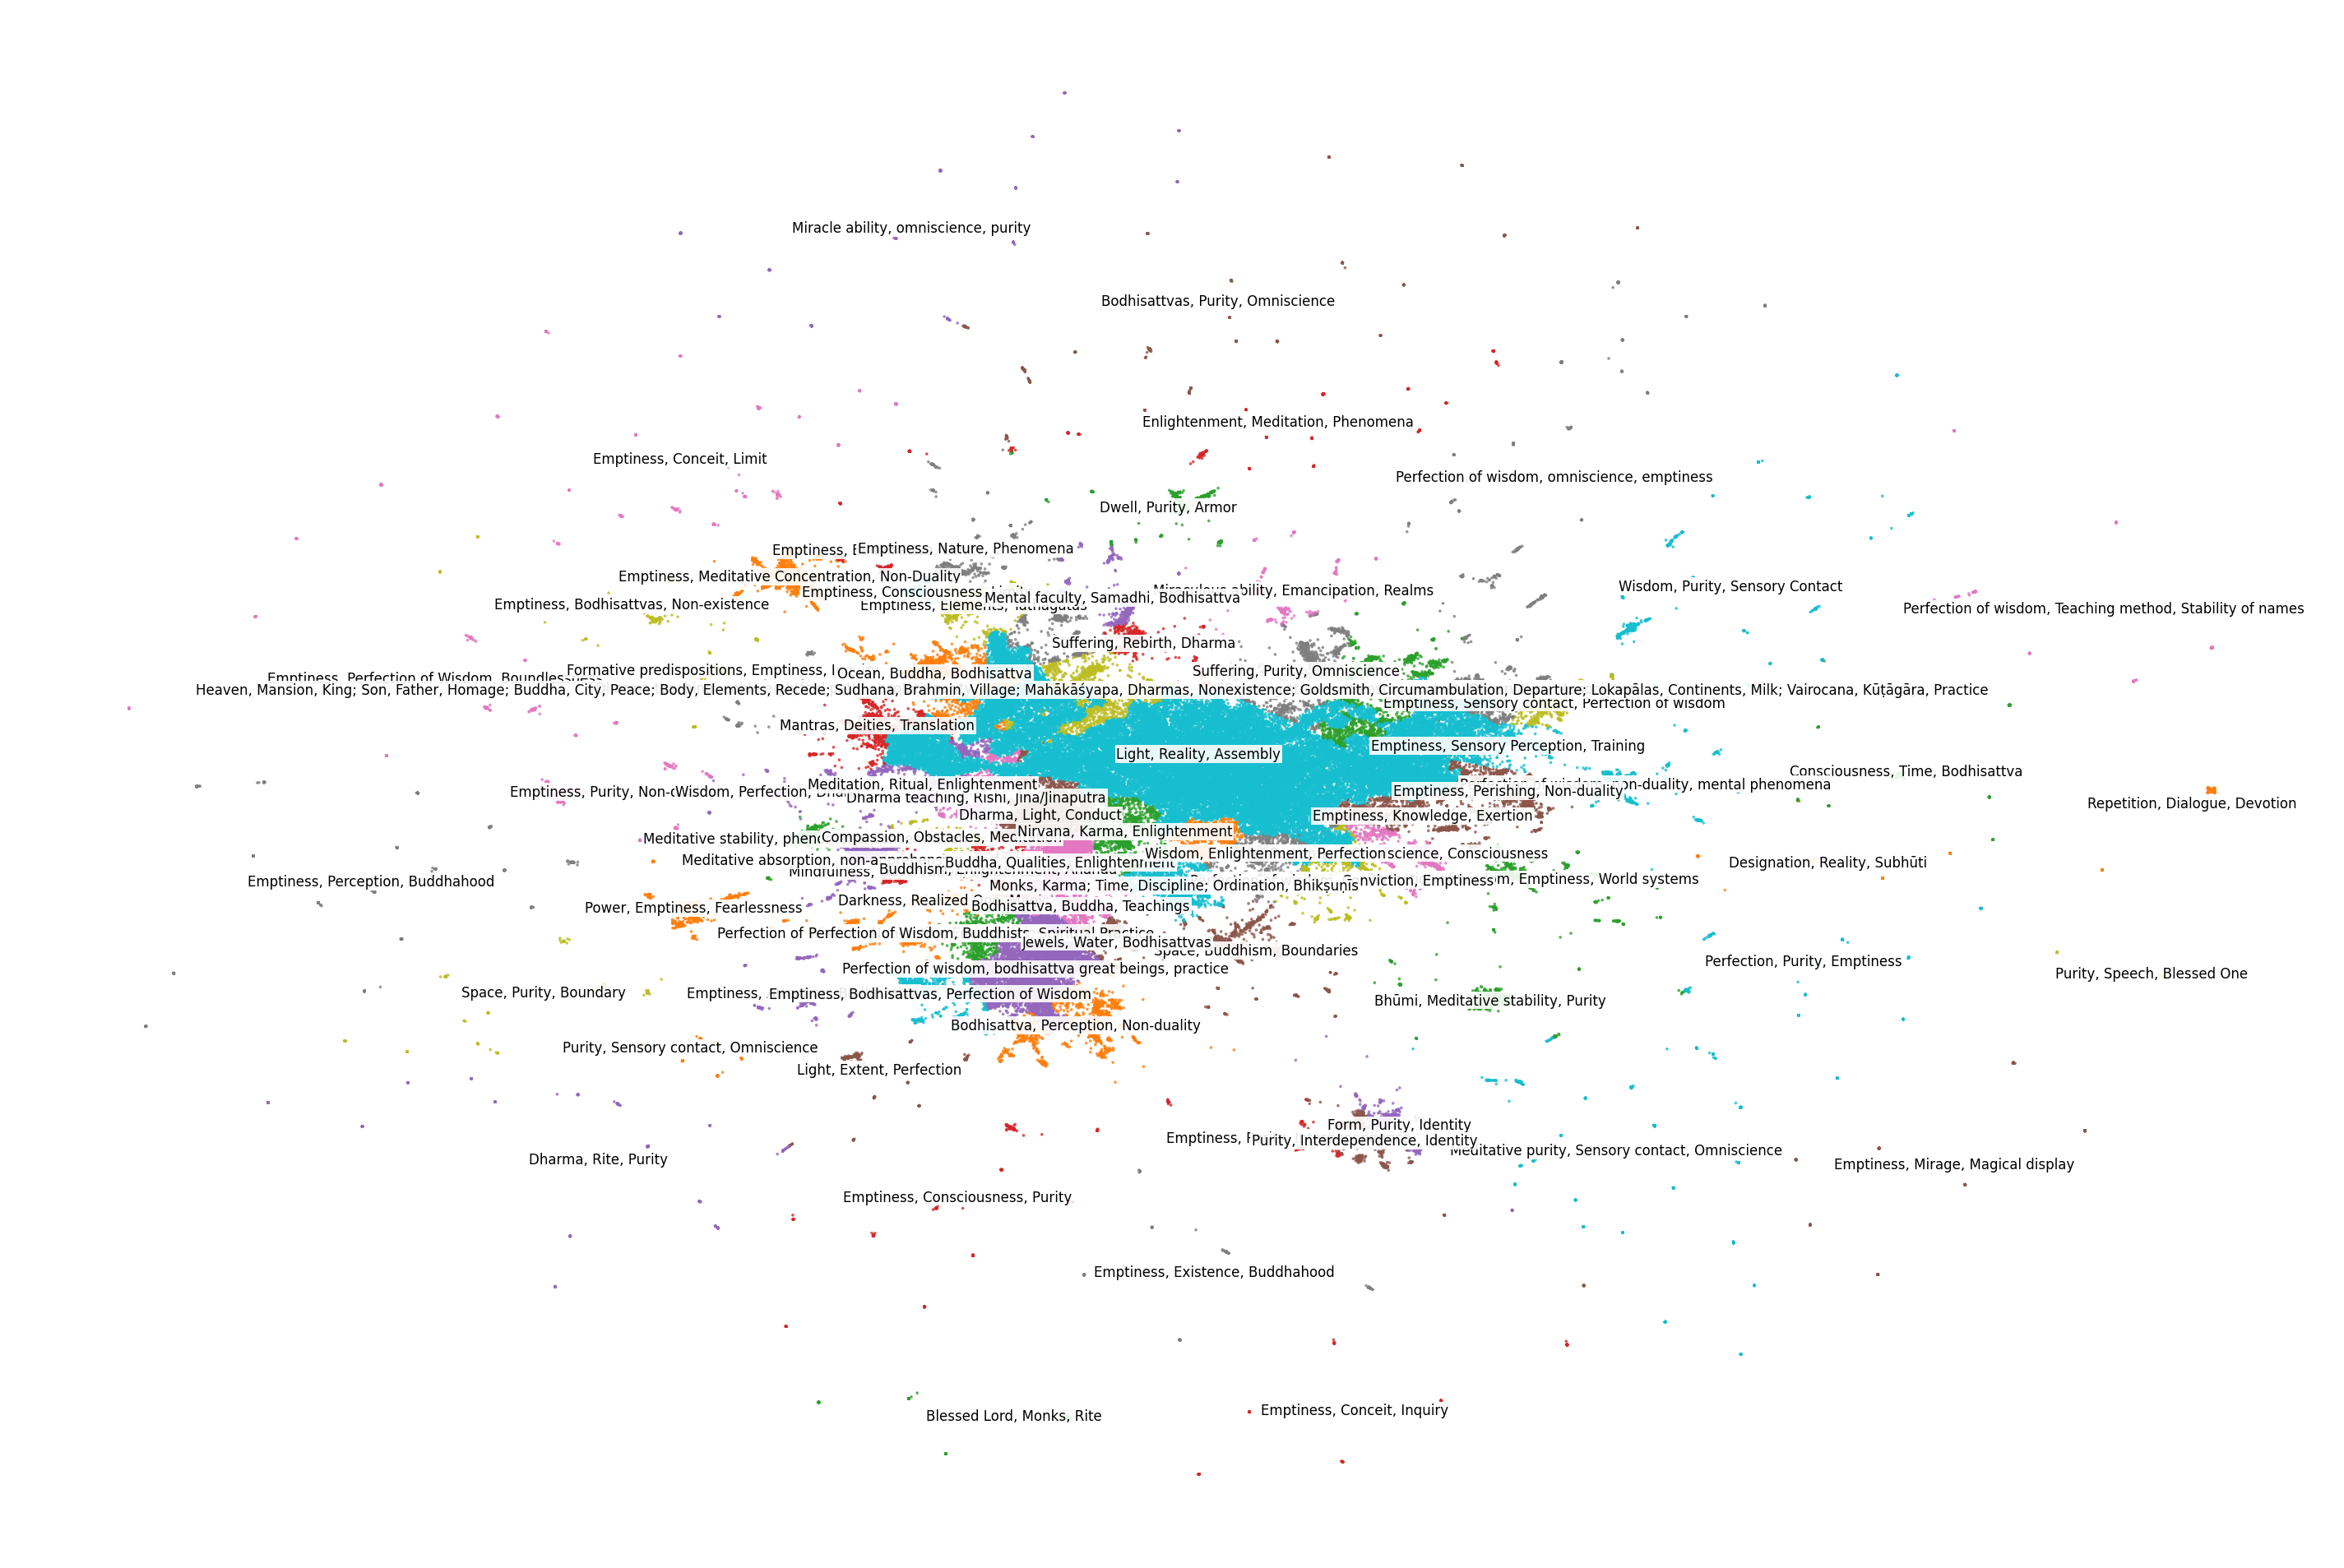

In [24]:
cc.show()

In [17]:
cc.save('84000-cc-wip')

In [25]:
summaries = [cc.cluster_summaries[label] if label in cc.cluster_summaries.keys() else 'None' for label in cc.cluster_labels]

In [26]:
ds[0]

{'tibetan': '༄༅༅། །རྒྱ་གར་སྐད་དུ། ཨཱརྱ་སུ་བརྞྞ་བཱ་ལུ་ཀོ་པ་མ་ནཱ་མ་མ་ཧཱ་ཡཱ་ན་སཱུ་ཏྲ། བོད་སྐད་དུ།',
 'english': 'The Noble Mahāyāna Sūtra Like Gold Dust'}

In [27]:
df = ds.to_pandas()
df.head()

,tibetan,english
0,༄༅༅། །རྒྱ་གར་སྐད་དུ། ཨཱརྱ་སུ་བརྞྞ་བཱ་ལུ་ཀོ་པ་མ...,The Noble Mahāyāna Sūtra Like Gold Dust
1,འཕགས་པ་གསེར་གྱི་བྱེ་མ་ལྟ་བུ་ཞེས་བྱ་བ་ཐེག་པ་ཆེན...,Homage to all buddhas and bodhisattvas.
2,སངས་རྒྱས་དང་། བྱང་ཆུབ་སེམས་དཔའ་ཐམས་ཅད་ལ་ཕྱག་འཚ...,Thus did I hear at one time.
3,འདི་སྐད་བདག་གིས་ཐོས་པ་དུས་གཅིག་ན།,The Blessed One was staying at Prince Jeta’s G...
4,བཅོམ་ལྡན་འདས་མཉན་དུ་ཡོད་པ་ན་རྒྱལ་བུ་རྒྱལ་བྱེད་...,"Venerable Ānanda rose from his seat, draped hi..."


In [29]:
df['topic'] = summaries
df.head()

,tibetan,english,topic
0,༄༅༅། །རྒྱ་གར་སྐད་དུ། ཨཱརྱ་སུ་བརྞྞ་བཱ་ལུ་ཀོ་པ་མ...,The Noble Mahāyāna Sūtra Like Gold Dust,"Meditation, Ritual, Enlightenment"
1,འཕགས་པ་གསེར་གྱི་བྱེ་མ་ལྟ་བུ་ཞེས་བྱ་བ་ཐེག་པ་ཆེན...,Homage to all buddhas and bodhisattvas.,"Jewels, Water, Bodhisattvas"
2,སངས་རྒྱས་དང་། བྱང་ཆུབ་སེམས་དཔའ་ཐམས་ཅད་ལ་ཕྱག་འཚ...,Thus did I hear at one time.,"Dharma, Rite, Purity"
3,འདི་སྐད་བདག་གིས་ཐོས་པ་དུས་གཅིག་ན།,The Blessed One was staying at Prince Jeta’s G...,"Light, Reality, Assembly"
4,བཅོམ་ལྡན་འདས་མཉན་དུ་ཡོད་པ་ན་རྒྱལ་བུ་རྒྱལ་བྱེད་...,"Venerable Ānanda rose from his seat, draped hi...","Buddhism, Enlightenment, Ānanda"


In [30]:
from datasets import Dataset

labeled_ds = Dataset.from_pandas(df)
labeled_ds[0]

{'tibetan': '༄༅༅། །རྒྱ་གར་སྐད་དུ། ཨཱརྱ་སུ་བརྞྞ་བཱ་ལུ་ཀོ་པ་མ་ནཱ་མ་མ་ཧཱ་ཡཱ་ན་སཱུ་ཏྲ། བོད་སྐད་དུ།',
 'english': 'The Noble Mahāyāna Sūtra Like Gold Dust',
 'topic': 'Meditation, Ritual, Enlightenment'}

In [31]:
labeled_ds.push_to_hub('billingsmoore/84000-bo-en')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/128 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/billingsmoore/84000-bo-en/commit/4eedf98b0997c9a78b493f500d5a8f429e6c106a', commit_message='Upload dataset', commit_description='', oid='4eedf98b0997c9a78b493f500d5a8f429e6c106a', pr_url=None, pr_revision=None, pr_num=None)